#### Welcome to my analysis! Today we are going to see if there is a correlation between a measure of a company's success (their total assets), and the amount of pollution they cause. Let's start with some general exploration and manipulation of the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy.stats import pearsonr

df=pd.read_csv('corpFinEnv.csv')


In [2]:
df.shape

(63, 12)

In [3]:
df.head()

,company,country,economic_sector,sub_industry,pollution,Total assets,Dividend,ROA,ROE,Direct emissions,Indirect emissions,quartile
0,ACCENTURE PLC,Ireland,Technology,IT Consulting & Other Services,non polluter,16992039,44.66,18.14,51.47,26290,237239,Medium
1,AIRBUS SE,Netherlands,Industrials,Aerospace & Defense,polluter,99922000,37.88,3.30,41.39,525883,401734,Huge
2,AKZO NOBEL N.V.,Netherlands,Basic Materials,Speciality Chemicals,polluter,14906000,39.24,7.19,15.95,1500000,2300000,Large
3,ALSTOM SA,France,Industrials,Construction Machinery & Heavy Transportation ...,polluter,32501000,0.00,-1.72,-15.67,54000,70000,Large
4,AP MOELLER MAERSK,Denmark,Industrials,Marine Transportation,polluter,422739287,NaN,1.62,2.15,33044000,415000,Huge


In [4]:
df.isnull()



,company,country,economic_sector,sub_industry,pollution,Total assets,Dividend,ROA,ROE,Direct emissions,Indirect emissions,quartile
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
58,False,False,False,False,False,False,True,False,False,False,False,False
59,False,False,False,False,False,False,False,False,False,False,False,False
60,False,False,False,False,False,False,False,False,False,False,False,False
61,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df=df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 0 to 62
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   company             48 non-null     object 
 1   country             48 non-null     object 
 2   economic_sector     48 non-null     object 
 3   sub_industry        48 non-null     object 
 4   pollution           48 non-null     object 
 5   Total assets        48 non-null     int64  
 6   Dividend            48 non-null     float64
 7   ROA                 48 non-null     float64
 8   ROE                 48 non-null     float64
 9   Direct emissions    48 non-null     int64  
 10  Indirect emissions  48 non-null     int64  
 11  quartile            48 non-null     object 
dtypes: float64(3), int64(3), object(6)
memory usage: 4.9+ KB


In [7]:
df.dtypes

company                object
country                object
economic_sector        object
sub_industry           object
pollution              object
Total assets            int64
Dividend              float64
ROA                   float64
ROE                   float64
Direct emissions        int64
Indirect emissions      int64
quartile               object
dtype: object

In [8]:
# Definitly not using this column for our analysis

df=df.drop(columns='quartile')

In [9]:
# Making a new column, Total Emissions, for later

df['Total emissions']=df['Direct emissions']+df['Indirect emissions']


In [10]:
df.describe()


,Total assets,Dividend,ROA,ROE,Direct emissions,Indirect emissions,Total emissions
count,4.800000e+01,48.000000,48.000000,48.000000,4.800000e+01,4.800000e+01,4.800000e+01
mean,2.155181e+07,37.552708,4.615625,9.092083,7.257819e+06,1.279509e+06,8.537327e+06
std,2.453689e+07,24.278579,7.079174,23.136905,2.642133e+07,2.925442e+06,2.888287e+07
min,7.921000e+05,0.000000,-19.280000,-103.840000,9.580000e+02,5.000000e+02,1.447700e+04
25%,6.622036e+06,25.660000,2.810000,5.617500,4.665000e+04,6.925000e+04,1.895000e+05
50%,1.271020e+07,39.410000,4.735000,12.520000,3.636070e+05,2.338830e+05,5.254315e+05
75%,2.785360e+07,52.255000,7.570000,18.767500,2.413125e+06,1.059676e+06,3.522500e+06
max,1.177570e+08,80.790000,18.140000,51.470000,1.760000e+08,1.600000e+07,1.920000e+08


In [11]:
df = df.set_index('company')


Although the sample dataset that we finish with is small, it is still statistically significant since the total number of rows is greater than 30.

What are the top ten companies with the most assets?

In [12]:
df = df.reset_index(drop=False)

df = df.set_index('Total assets')

df = df.sort_index(ascending=False)

df.iloc[0:10,0]


Total assets
117757000             SIEMENS AG
99922000               AIRBUS SE
69045000                 BASF SE
64673541        ARCELORMITTAL SA
62959124     VESTAS WIND SYSTEMS
40073000      SCHNEIDER ELECTRIC
35863000        DEUTSCHE POST AG
33663000         THYSSENKRUPP AG
32501000               ALSTOM SA
31858000                 CRH PLC
Name: company, dtype: object

What about the top ten most polluting?

In [13]:
df = df.reset_index(drop=False)

df = df.set_index('Total emissions')

df = df.sort_index(ascending=False)

df.iloc[0:10,1]

Total emissions
192000000        ARCELORMITTAL SA
53100000      HEIDELBERGCEMENT AG
33800000          THYSSENKRUPP AG
25268000            L'AIR LIQUIDE
22170000                  BASF SE
21800000                  CRH PLC
9122248      FOMENTO CONSTRUCCION
6800000           UPM-KYMMENE OYJ
6050000          DEUTSCHE POST AG
4641000                LANXESS AG
Name: company, dtype: object

In [14]:
df = df.reset_index(drop=False)

#### Let's visualize the distributions of some of the key columns we will be looking at! For this first graph, there were too many outliers that were hindering the appearence of the boxplot so we ommitted them just for the Total Emissions graph.

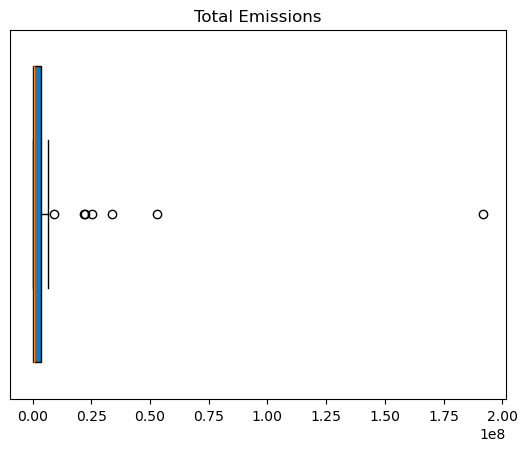

In [15]:
# Total Emissions boxplot

df = df.reset_index(drop=False)

plt.boxplot(df['Total emissions'],vert=False,widths=.8,patch_artist=True)

# FIX OR LABEL SCALE?

plt.yticks([])
plt.title('Total Emissions')

plt.show()

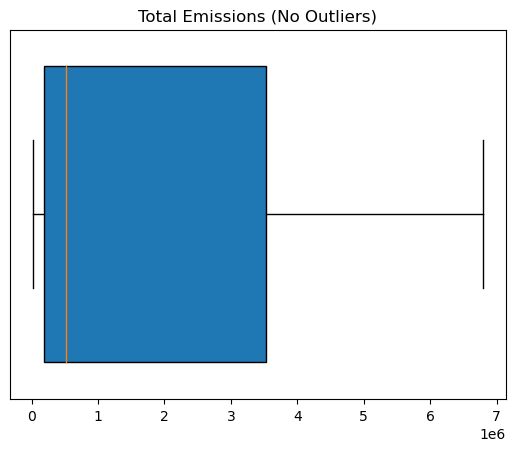

In [16]:
#Total Emissions with no outliers boxplot

plt.boxplot(df['Total emissions'],vert=False,widths=.8,sym='',patch_artist=True)

#FIX OR LABEL SCALE?

plt.yticks([])
plt.title('Total Emissions (No Outliers)')

plt.show()

Text(0.5, 1.0, 'Economic Sector')

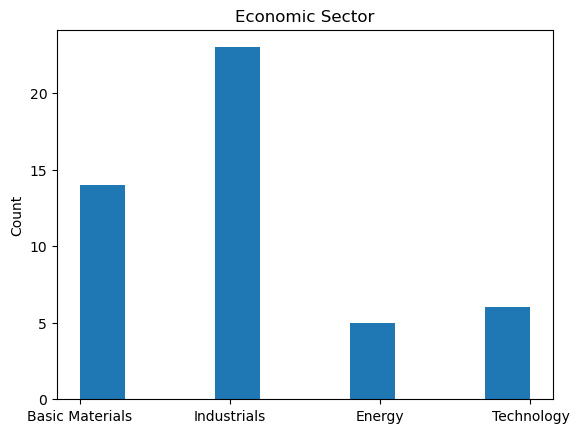

In [17]:
#Economic sector barplot

plt.hist(df['economic_sector'])

plt.ylabel('Count')

plt.title('Economic Sector')

/Users/josh/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(-381.68055555555554, 0.5, '')

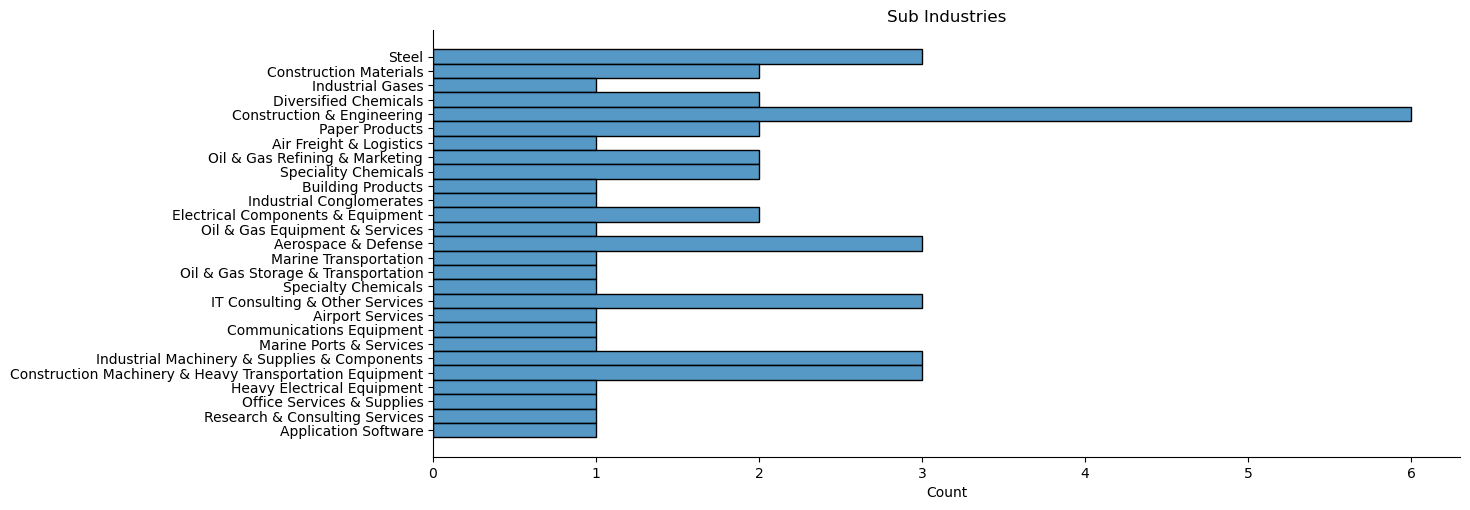

In [18]:
# Sub-Industry barplot

sns.displot(y=df['sub_industry'],aspect=3)

plt.title('Sub Industries')

plt.ylabel('')

Text(0, 0.5, 'Emissions (Hundred Millions)')

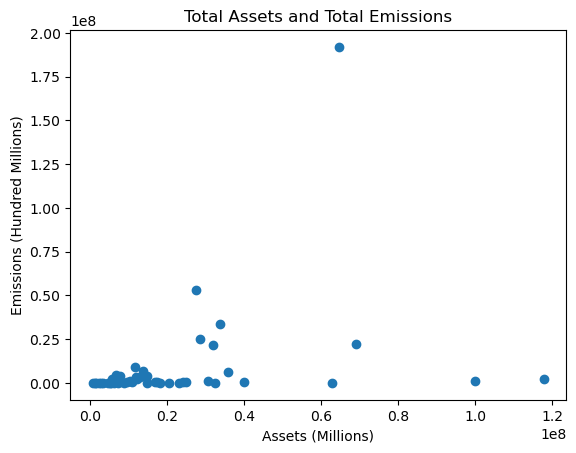

In [19]:
#Total Assets and Emissions scatterplot

plt.scatter(x=df['Total assets'],y=df['Total emissions'])

plt.title('Total Assets and Total Emissions')

plt.xlabel('Assets (Millions)')
plt.ylabel('Emissions (Hundred Millions)')

#### This scatter plot includes outliers at the expense of seeing what is really going on in that bottom lefthand corner, let's take a closer look at the distribution of where the majority of the data lies.

(0.0, 35000000.0)

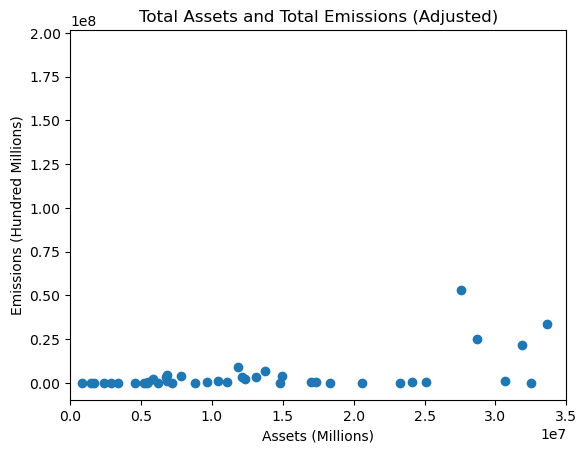

In [20]:
plt.scatter(x=df['Total assets'],y=df['Total emissions'])

plt.title('Total Assets and Total Emissions (Adjusted)')

plt.xlabel('Assets (Millions)')
plt.ylabel('Emissions (Hundred Millions)')

plt.xlim(0,.35*10**8)


From looking at it, there appears to be a weak linear correlation between the two. Let's add that to the plot!

Text(0.5, 0, 'Total Assets')

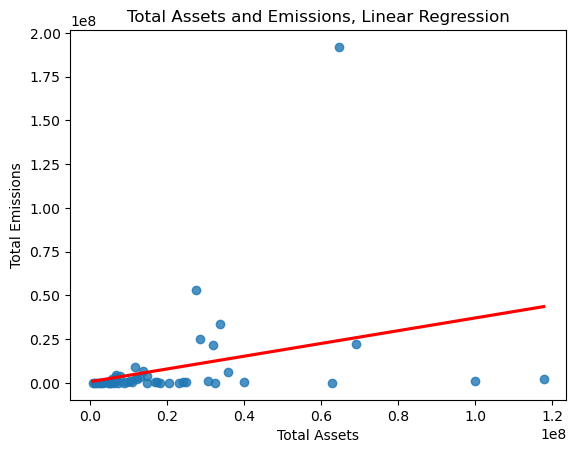

In [21]:
# Adding line of best fit 

sns.regplot(x=df['Total assets'],y=df['Total emissions'],line_kws={'color':'red'},ci=None)

plt.title('Total Assets and Emissions, Linear Regression')

plt.ylabel('Total Emissions')
plt.xlabel('Total Assets')

#### Lets now do a correlation test on the Total Assets and Total Emissions, with a significance level of 0.05. 
H0: The correlation between Total Assets and Total Emissions is not statistcally significant. 

H1: The correlation between Total Assets and Total Emissions is statistcally significant.

In [22]:
# P Test

correlation_coefficient, p_value=pearsonr(df['Total assets'],df['Total emissions'])

print(f'Correlation Coefficient: {correlation_coefficient}')
      
print(f'P Value: {p_value}')


Correlation Coefficient: 0.3098805551545818
P Value: 0.03208147887529106


With a P Value of 0.03, we can reject our null hypothesis and make the conclusion that the correlation between Total Assets and Total Emissions is statistically significant! However, it is also important to note that our correlation coefficient indicates a weak, but positive, correlation between the two variables.

#### Since there is a statiscally significant relationship between a company's total assets and emissions, it would be useful to predict whether or not a company will be a  polluter based off its total number of assets. 

First, we are going to get ride of the old column "pollution" since we don't know how this variable was measured. We are going to replace it with a new column that clearly indicates which companies are above average polluters. 

In [23]:
# Get rid of old column "pollution"
df=df.drop(columns='pollution')

In [24]:
# Make new column named Above Av. Polluter

averagePol = df['Total emissions'].mean()

averagePol = int(averagePol)

df['Above Av. Polluter']=df['Total emissions'] > averagePol


Let's use machine learning to predict whether a company will be an above average polluter based off of its total emissions, with user input.

In [25]:
from sklearn.tree import DecisionTreeClassifier

answer = input('How much carbon gas does your company put out? ')
answer = int(answer)

X = df['Total emissions']

X = np.array(X)

X = X.reshape(-1,1)

Y = df['Above Av. Polluter']

modelA = DecisionTreeClassifier()

modelA.fit(X,Y)

modelA.predict([[answer]])

array([False])